In [13]:
import math
import numpy as np
from numpy.lib.polynomial import poly
from scipy.signal import freqz

## función para obtener los polos

In [14]:
def polosButt(N):
    ang = lambda n: (2* n + N+1)*np.pi / (2* N)

    return np.array([np.exp(1j * ang(i)) for i in range(N)])


In [15]:
print(polosButt(4))

[-0.38268343+0.92387953j -0.92387953+0.38268343j -0.92387953-0.38268343j
 -0.38268343-0.92387953j]


## transformación de frecuencia
Recibe los polos y la frecuencia de corte, es una trasformación de pasa alto

In [16]:
def tranf(polos, wc):
    zeros = np.zeros(polos.size)
    new_polos = [wc/p for p in polos]
    mult_k = [(-1/p) for p in polos]
    k = math.prod(mult_k, start=1) #factor de ganacia acumulativo
    
    return [zeros, np.array(new_polos), k] 

## transformación bilineal

In [17]:
# T: el periodo de muestreo
def bilineal(zeros, polos, k, T):

    tranf_zero = lambda z: (2/T + z) / (2/T - z)
    new_zeros = [tranf_zero(z) for z in zeros]

    k_zeros = [2/T - z for z in zeros]
    kk = math.prod(k_zeros, start = 1)
    k = kk * k

    tranf_polo = lambda p: (2/T + p) / (2/T - p)
    new_polos = [tranf_polo(p) for p in polos]
    
    k_polos = [1/(2/T - p) for p in polos]
    kk = math.prod(k_polos, start= 1)
    k = kk * k

    num = np.real(k * poly(new_zeros))
    den = np.real(poly(new_polos))
    return num, den 

# implementación

## butterword filter

In [18]:
def butt(N, fc, fm):
    polos = polosButt(N)
    f = fm * math.tan(fc * np.pi / fm) / np.pi 
    (z, n_p, k) = tranf(polos, 2*np.pi * f) # 2*pi * f es para tranformarla en omega angular
    return bilineal(z, n_p, k, 1/fm)

# Prueba

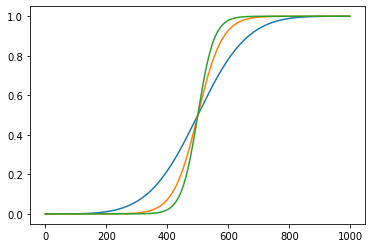

In [22]:
fm = 2000
fc = 500
#orden 2
(num, den) = butt(2, fc, fm)
w, h = freqz(num, den)

import matplotlib.pyplot as plt

plt.plot(((fm/2)/np.pi)*w, np.abs(h)**2)

#orden 4
(num, den) = butt(4, fc, fm)
w, h = freqz(num, den)

plt.plot(((fm/2)/np.pi)*w, np.abs(h)**2)

#orden 6
(num, den) = butt(6, fc, fm)
w, h = freqz(num, den)

plt.plot(((fm/2)/np.pi)*w, np.abs(h)**2)

